Rezolvare exercitiul 1 - in folder, un pdf cu exercitiul scris pe foaie

Rezolvare exercitiul 2:

Eroare: Probabilitățile trebuie să fie 3 numere între 0 și 1 care însumează 1.
Eroare: Probabilitățile trebuie să fie 3 numere între 0 și 1 care însumează 1.
Vecinătățile:
S1: ['S2']
S2: ['S1', 'S3']
S3: ['S2', 'S4']
S4: ['S3', 'S5']
S5: ['S4', 'S6']
S6: ['S5']
Factorii rețelei:
+-------+-------+--------------+
| S1    | S2    |   phi(S1,S2) |
+=======+=======+==============+
| S1(0) | S2(0) |       0.7000 |
+-------+-------+--------------+
| S1(0) | S2(1) |       0.2000 |
+-------+-------+--------------+
| S1(0) | S2(2) |       0.1000 |
+-------+-------+--------------+
| S1(1) | S2(0) |       0.2000 |
+-------+-------+--------------+
| S1(1) | S2(1) |       0.6000 |
+-------+-------+--------------+
| S1(1) | S2(2) |       0.2000 |
+-------+-------+--------------+
| S1(2) | S2(0) |       0.1000 |
+-------+-------+--------------+
| S1(2) | S2(1) |       0.3000 |
+-------+-------+--------------+
| S1(2) | S2(2) |       0.6000 |
+-------+-------+--------------+
+-------+-------+----------

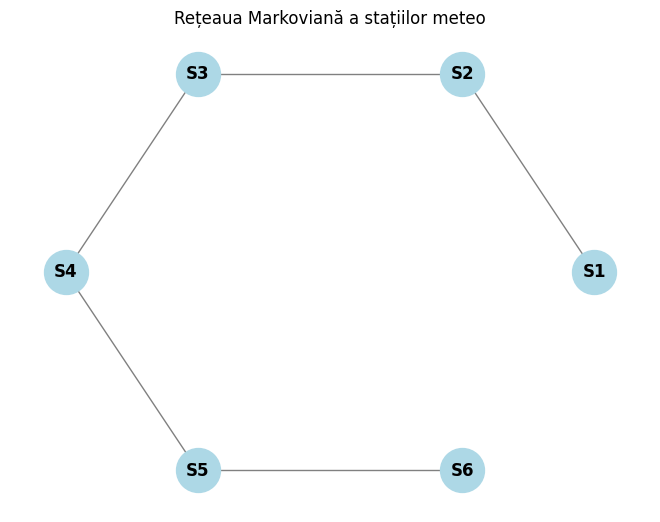


Predicțiile MAP pentru stările vremii la fiecare stație:
S1: Soare
S2: Soare
S3: Soare
S4: Soare
S5: Soare
S6: Soare


In [1]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def validate_probabilities(probabilities):
    if len(probabilities) != 3:
        return False
    if any(p < 0 or p > 1 for p in probabilities):
        return False
    if abs(sum(probabilities) - 1) > 1e-6:
        return False
    return True

def visualize_network(neighbors, n):
    G = nx.Graph()

    for i in range(n):
        G.add_node(f'S{i + 1}')

    for station, neighbors_list in neighbors.items():
        for neighbor in neighbors_list:
            G.add_edge(station, neighbor)

    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')
    plt.title("Rețeaua Markoviană a stațiilor meteo")
    plt.show()

def main():
    n = int(input("Introdu numărul de stații meteo (număr întreg pozitiv): "))
    model = MarkovNetwork()
    stations = [f'S{i+1}' for i in range(n)]
    model.add_nodes_from(stations)

    neighbors = {station: [] for station in stations}
    for i in range(n):
        neighbor_input = input(f"Introdu vecinii pentru stația {stations[i]} (ex: 2 3 pentru vecinii S2 și S3): ")
        neighbor_indices = list(map(int, neighbor_input.split()))
        for neighbor in neighbor_indices:
            neighbor_station = f'S{neighbor}'
            if neighbor_station not in neighbors[stations[i]]:
                neighbors[stations[i]].append(neighbor_station)
            if stations[i] not in neighbors[neighbor_station]:
                neighbors[neighbor_station].append(stations[i])
            model.add_edge(stations[i], neighbor_station)

    potential_matrix = np.array([[0.7, 0.2, 0.1], 
                                 [0.2, 0.6, 0.2], 
                                 [0.1, 0.3, 0.6]])

    for station, neighbors_list in neighbors.items():
        for neighbor in neighbors_list:
            factor = DiscreteFactor(variables=[station, neighbor], 
                                    cardinality=[3, 3], 
                                    values=potential_matrix.flatten())
            model.add_factors(factor)

    for i in range(n):
        while True:
            initial_prob_input = input(f"Introdu probabilitățile inițiale pentru {stations[i]} (ex: 0.5 0.3 0.2): ")
            initial_probs = list(map(float, initial_prob_input.split()))
            if validate_probabilities(initial_probs):
                break
            else:
                print("Eroare: Probabilitățile trebuie să fie 3 numere între 0 și 1 care însumează 1.")
        
        initial_factor = DiscreteFactor(variables=[stations[i]], 
                                        cardinality=[3], 
                                        values=initial_probs)
        model.add_factors(initial_factor)

    print("Vecinătățile:")
    for station, neighbors_list in neighbors.items():
        print(f"{station}: {neighbors_list}")

    print("Factorii rețelei:")
    for factor in model.get_factors():
        print(factor)

    visualize_network(neighbors, n)

    bp = BeliefPropagation(model)
    map_result = bp.map_query(variables=stations)
    
    print("\nPredicțiile MAP pentru stările vremii la fiecare stație:")
    for station, state in map_result.items():
        weather = ["Soare", "Ploaie", "Nori"][state]
        print(f"{station}: {weather}")

if __name__ == "__main__":
    main()


Exercitiul 3:

a) Generarea imaginii originale
Imaginea 5X5 cu valori aleatoare intre 0 si 255 (diferite nuante de gri)

Imaginea originală:
[[102 179  92  14 106]
 [ 71 188  20 102 121]
 [210 214  74 202  87]
 [116  99 103 151 130]
 [149  52   1  87 235]]


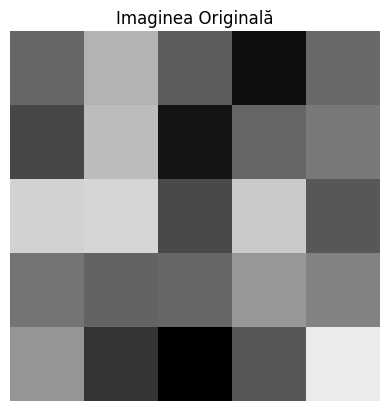

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

original_image = np.random.randint(0, 256, size=(5, 5))
print("Imaginea originală:")
print(original_image)

plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.title("Imaginea Originală")
plt.axis('off')
plt.show()


b)Crearea imaginii zgomotoase
- se modifica aprox. 10% din pixelii imaginii originale


Imaginea zgomotoasă:
[[102 179  92  14 106]
 [ 71 188  20 102 121]
 [210 214  74 202  87]
 [116  99  56 151 130]
 [149  52   1 125 235]]


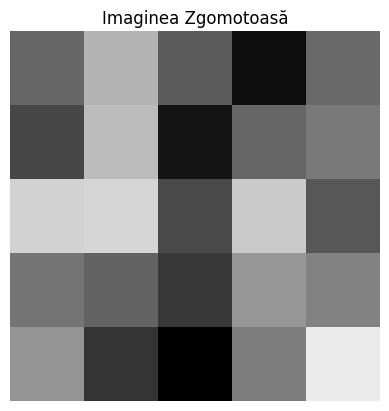

In [3]:
noisy_image = original_image.copy()
num_noisy_pixels = int(0.1 * noisy_image.size)
indices = np.random.choice(noisy_image.size, num_noisy_pixels, replace=False)

for idx in indices:
    i, j = np.unravel_index(idx, noisy_image.shape)
    noise = np.random.randint(-50, 51)
    noisy_image[i, j] = np.clip(original_image[i, j] + noise, 0, 255)

print("\nImaginea zgomotoasă:")
print(noisy_image)

plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
plt.title("Imaginea Zgomotoasă")
plt.axis('off')
plt.show()


c) Definirea retelei Markov
- adaugarea nodurilor si muchiilor intre pixelii vecini -> dependentele intre pixeli
- definirea functiei energie


Rețeaua Markoviană a fost creată.

Energia inițială a imaginii zgomotoase: 540964


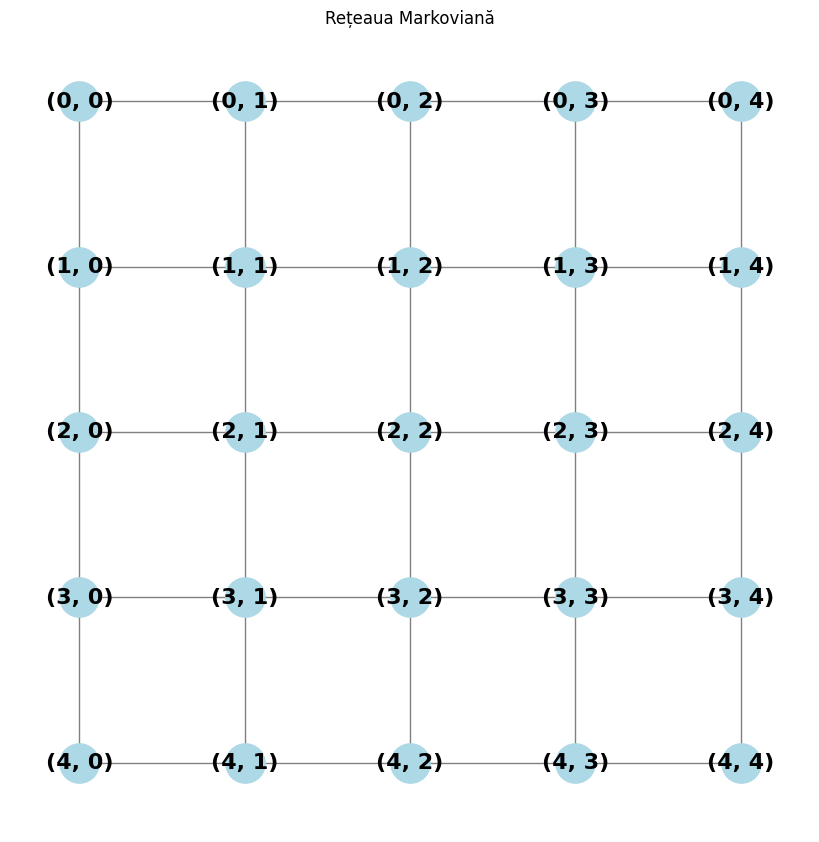

In [4]:
from pgmpy.models import MarkovNetwork
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

model = MarkovNetwork()

for i in range(5):
    for j in range(5):
        model.add_node((i, j))

for i in range(5):
    for j in range(5):
        if i > 0:  # N
            model.add_edge((i, j), (i - 1, j))
        if i < 4:  # S
            model.add_edge((i, j), (i + 1, j))
        if j > 0:  # W
            model.add_edge((i, j), (i, j - 1))
        if j < 4:  # E
            model.add_edge((i, j), (i, j + 1))

print("Rețeaua Markoviană a fost creată.")

def energy_function(estimated_image, noisy_image, lambda_factor=1):
    energy = 0
    for i in range(5):
        for j in range(5):
            energy += lambda_factor * (estimated_image[i, j] - noisy_image[i, j]) ** 2
            
            if i > 0:  # N
                energy += (estimated_image[i, j] - estimated_image[i - 1, j]) ** 2
            if i < 4:  # S
                energy += (estimated_image[i, j] - estimated_image[i + 1, j]) ** 2
            if j > 0:  # W
                energy += (estimated_image[i, j] - estimated_image[i, j - 1]) ** 2
            if j < 4:  # E
                energy += (estimated_image[i, j] - estimated_image[i, j + 1]) ** 2
    return energy

initial_energy = energy_function(noisy_image, noisy_image)
print("\nEnergia inițială a imaginii zgomotoase:", initial_energy)

plt.figure(figsize=(8, 8))
G = nx.Graph()

for edge in model.edges():
    G.add_edge(edge[0], edge[1])

pos = {(i, j): (j, -i) for i in range(5) for j in range(5)}

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=16, font_color='black', font_weight='bold', edge_color='gray')
plt.title("Rețeaua Markoviană")
plt.axis('off')
plt.show()

d) MAP -> estimarea imaginii originale pornind de la cea modificata

Imaginea originală:
[[102 179  92  14 106]
 [ 71 188  20 102 121]
 [210 214  74 202  87]
 [116  99 103 151 130]
 [149  52   1  87 235]]

Imaginea zgomotoasă:
[[102 179  92  14 106]
 [ 71 188  20 102 121]
 [210 214  74 202  87]
 [116  99  56 151 130]
 [149  52   1 125 235]]

Imaginea estimată:
[[113 103 113 103 113]
 [103 113 103 113 103]
 [113 103 113 103 113]
 [103 113 103 113 103]
 [113 103 113 103 113]]


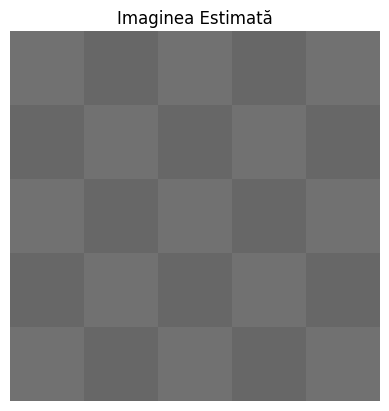

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

original_image = np.random.randint(0, 256, size=(5, 5))
print("Imaginea originală:")
print(original_image)

noisy_image = original_image.copy()
num_noisy_pixels = int(0.1 * noisy_image.size)
indices = np.random.choice(noisy_image.size, num_noisy_pixels, replace=False)

for idx in indices:
    i, j = np.unravel_index(idx, noisy_image.shape)
    noise = np.random.randint(-50, 51)
    noisy_image[i, j] = np.clip(original_image[i, j] + noise, 0, 255)

print("\nImaginea zgomotoasă:")
print(noisy_image)

def energy_function(estimated_image, noisy_image, lambda_factor=1):
    energy = 0
    for i in range(5):
        for j in range(5):
            energy += lambda_factor * (estimated_image[i, j] - noisy_image[i, j]) ** 2
            
            if i > 0:  # N
                energy += (estimated_image[i, j] - estimated_image[i - 1, j]) ** 2
            if i < 4:  # S
                energy += (estimated_image[i, j] - estimated_image[i + 1, j]) ** 2
            if j > 0:  # W
                energy += (estimated_image[i, j] - estimated_image[i, j - 1]) ** 2
            if j < 4:  # E
                energy += (estimated_image[i, j] - estimated_image[i, j + 1]) ** 2
    return energy

estimated_image = noisy_image.copy()

iterations = 100
lambda_factor = 1

for _ in range(iterations):
    new_estimated_image = estimated_image.copy()
    for i in range(5):
        for j in range(5):
            neighbors = []
            if i > 0:  # N
                neighbors.append(estimated_image[i-1, j])
            if i < 4:  # S
                neighbors.append(estimated_image[i+1, j])
            if j > 0:  # W
                neighbors.append(estimated_image[i, j-1])
            if j < 4:  # E
                neighbors.append(estimated_image[i, j+1])
            
            if neighbors:
                new_estimated_image[i, j] = np.clip(np.mean(neighbors), 0, 255)
    
    estimated_image = new_estimated_image

print("\nImaginea estimată:")
print(estimated_image)

plt.imshow(estimated_image, cmap='gray', vmin=0, vmax=255)
plt.title("Imaginea Estimată")
plt.axis('off')
plt.show()


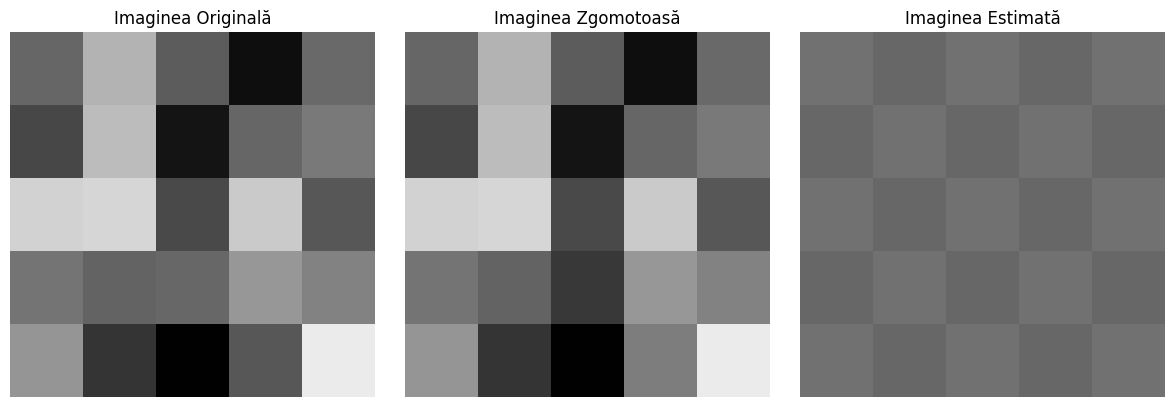

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Imaginea Originală")
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Imaginea Zgomotoasă")
plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Imaginea Estimată")
plt.imshow(estimated_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()